In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#On importe les fihcers qui nous interesse
# Chargement des fichiers sélectionnés
circuits_df = pd.read_csv('circuits.csv')
constructors_df = pd.read_csv('constructors.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

In [ ]:
#On regarde nos dataset et on supprime les colonnes inutile

In [5]:
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [33]:
circuits_df = circuits_df.iloc[:, :5]

In [35]:
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [37]:
constructors_df = constructors_df.iloc[:, :4]

In [9]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [41]:
races_df = races_df.iloc[:, :6]

In [45]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [13]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [47]:
drivers_df = drivers_df.iloc[:, :6]

In [49]:
#On merge les data set
def merge_dataframes(circuits_df, constructors_df, races_df, results_df, drivers_df):
    # Merge results avec races
    merged_df = pd.merge(results_df, races_df, on='raceId', how='inner')
    
    # Merge avec drivers
    merged_df = pd.merge(merged_df, drivers_df, on='driverId', how='inner')

    # Merge avec constructors
    merged_df = pd.merge(merged_df, constructors_df, on='constructorId', how='inner')

    # Merge avec circuits
    merged_df = pd.merge(merged_df, circuits_df, on='circuitId', how='inner')

    print("\n✅ Les DataFrames ont été fusionnés avec succès !")
    print(f" - Nombre de lignes du DataFrame final : {merged_df.shape[0]}")
    print(f" - Nombre de colonnes du DataFrame final : {merged_df.shape[1]}")
    return merged_df

In [76]:
# Création du DataFrame principal
main_df = merge_dataframes(circuits_df, constructors_df, races_df, results_df, drivers_df)

# Affichage d'un aperçu des premières lignes
main_df.head(50)


✅ Les DataFrames ont été fusionnés avec succès !
 - Nombre de lignes du DataFrame final : 26759
 - Nombre de colonnes du DataFrame final : 35


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,code,forename,surname,constructorRef,name_y,nationality,circuitRef,name,location,country
0,1,18,1,1,22,1,1,1,1,10.0,...,HAM,Lewis,Hamilton,mclaren,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,18,2,2,3,5,2,2,2,8.0,...,HEI,Nick,Heidfeld,bmw_sauber,BMW Sauber,German,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
2,3,18,3,3,7,7,3,3,3,6.0,...,ROS,Nico,Rosberg,williams,Williams,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
3,4,18,4,4,5,11,4,4,4,5.0,...,ALO,Fernando,Alonso,renault,Renault,French,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
4,5,18,5,1,23,3,5,5,5,4.0,...,KOV,Heikki,Kovalainen,mclaren,McLaren,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
5,6,18,6,3,8,13,6,6,6,3.0,...,NAK,Kazuki,Nakajima,williams,Williams,British,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
6,7,18,7,5,14,17,7,7,7,2.0,...,BOU,Sébastien,Bourdais,toro_rosso,Toro Rosso,Italian,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
7,8,18,8,6,1,15,8,8,8,1.0,...,RAI,Kimi,Räikkönen,ferrari,Ferrari,Italian,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
8,9,18,9,2,4,2,\N,R,9,0.0,...,KUB,Robert,Kubica,bmw_sauber,BMW Sauber,German,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
9,10,18,10,7,12,18,\N,R,10,0.0,...,GLO,Timo,Glock,toyota,Toyota,Japanese,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia


In [70]:
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number_x         26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [74]:
print(main_df.describe(include='all'))

            resultId        raceId      driverId  constructorId number_x  \
count   26759.000000  26759.000000  26759.000000   26759.000000    26759   
unique           NaN           NaN           NaN            NaN      130   
top              NaN           NaN           NaN            NaN        4   
freq             NaN           NaN           NaN            NaN     1019   
mean    13380.977391    551.687283    278.673530      50.180537      NaN   
std      7726.134642    313.265036    282.703039      61.551498      NaN   
min         1.000000      1.000000      1.000000       1.000000      NaN   
25%      6690.500000    300.000000     57.000000       6.000000      NaN   
50%     13380.000000    531.000000    172.000000      25.000000      NaN   
75%     20069.500000    811.000000    399.500000      63.000000      NaN   
max     26764.000000   1144.000000    862.000000     215.000000      NaN   

                grid position positionText  positionOrder        points  ...  \
count  

In [78]:
main_df.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number_x           0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
year               0
round              0
circuitId          0
name_x             0
date               0
driverRef          0
number_y           0
code               0
forename           0
surname            0
constructorRef     0
name_y             0
nationality        0
circuitRef         0
name               0
location           0
country            0
dtype: int64

In [90]:
#il y a pas de données manquante apparante
main_df.to_csv('F1_Main_Dataset.csv', index=False)


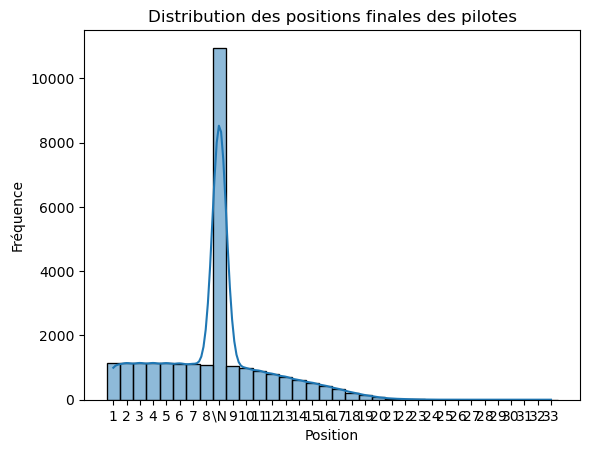

In [84]:
# Distribution des positions finales (classement)
sns.histplot(main_df['position'], bins=20, kde=True)
plt.title('Distribution des positions finales des pilotes')
plt.xlabel('Position')
plt.ylabel('Fréquence')
plt.show()

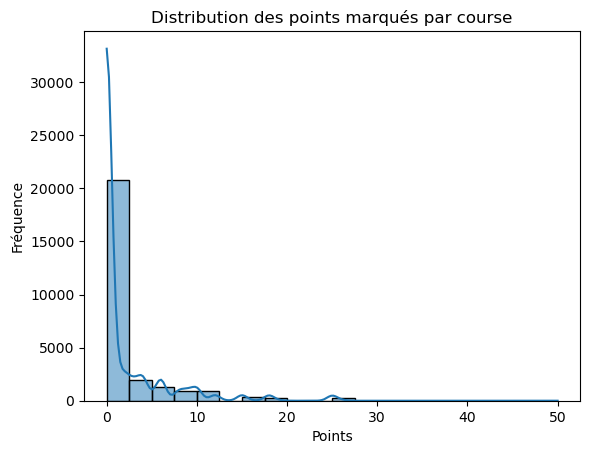

In [86]:
# Distribution des points marqués par course
sns.histplot(main_df['points'], bins=20, kde=True)
plt.title('Distribution des points marqués par course')
plt.xlabel('Points')
plt.ylabel('Fréquence')
plt.show()

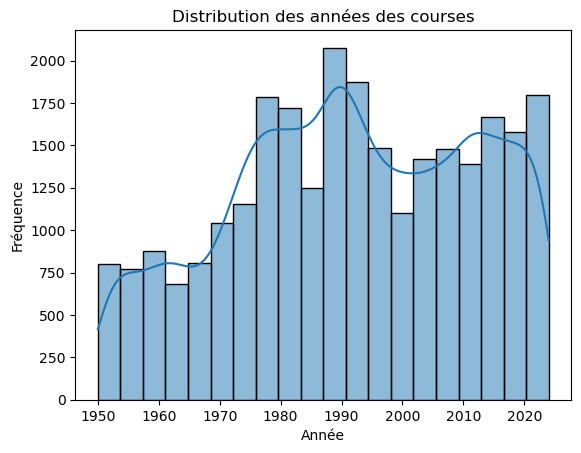

In [88]:
# Distribution des années des courses
sns.histplot(main_df['year'], bins=20, kde=True)
plt.title('Distribution des années des courses')
plt.xlabel('Année')
plt.ylabel('Fréquence')
plt.show()

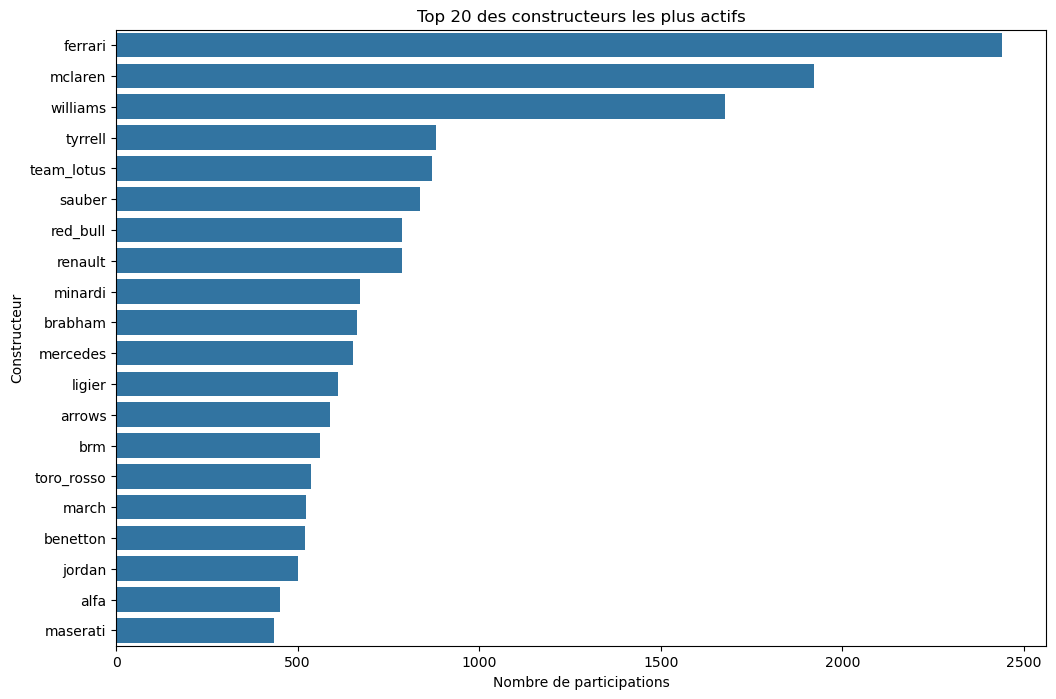

In [94]:
# 📌 Distribution des 20 principaux constructeurs
plt.figure(figsize=(12, 8))
top_constructors = main_df['constructorRef'].value_counts().head(20)
sns.barplot(y=top_constructors.index, x=top_constructors.values)
plt.title('Top 20 des constructeurs les plus actifs')
plt.xlabel('Nombre de participations')
plt.ylabel('Constructeur')
plt.show()

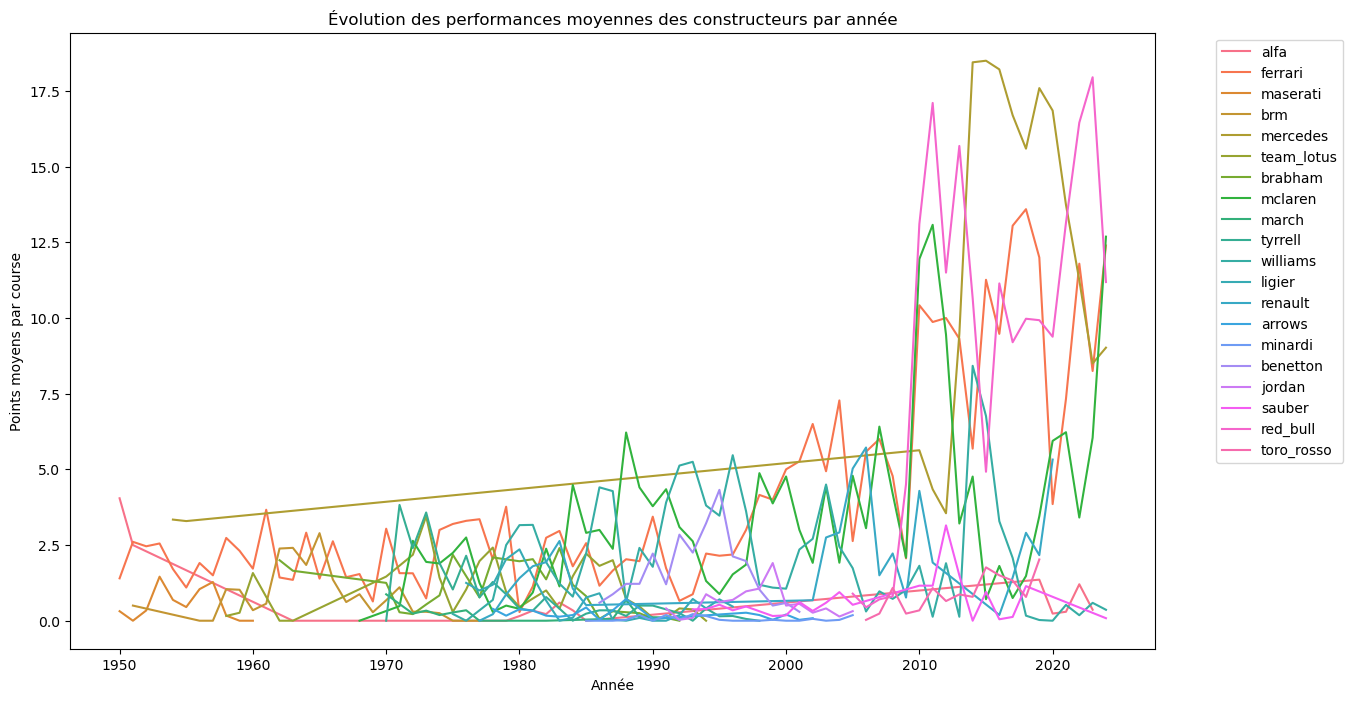

In [98]:
# 📌 Évolution améliorée des performances des constructeurs au fil des années
plt.figure(figsize=(14, 8))
top_constructors_names = top_constructors.index.tolist()
constructor_performance = main_df[main_df['constructorRef'].isin(top_constructors_names)]

# Calcul des points moyens par constructeur chaque année
avg_points_per_year = constructor_performance.groupby(['year', 'constructorRef'])['points'].mean().reset_index()

# Visualisation
sns.lineplot(data=avg_points_per_year, x='year', y='points', hue='constructorRef')
plt.title('Évolution des performances moyennes des constructeurs par année')
plt.xlabel('Année')
plt.ylabel('Points moyens par course')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
